In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Preprocess the data
train_images = np.stack([train_images]*3, axis=-1)  # Convert to 3 channels
test_images = np.stack([test_images]*3, axis=-1)
train_images = train_images.astype('float32') / 255.0  # Normalize to [0,1]
test_images = test_images.astype('float32') / 255.0

In [ ]:
# Resize images to 64x64 to reduce resource usage
train_images = tf.image.resize(train_images, (64, 64))
test_images = tf.image.resize(test_images, (64, 64))

In [ ]:
# Use ImageDataGenerator for efficient data loading
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=32)

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False

In [ ]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=15, validation_data=test_generator)

Epoch 1/15
1875/1875 [==============================] - 49s 23ms/step - loss: 0.5718 - accuracy: 0.7967 - val_loss: 0.3950 - val_accuracy: 0.8535
Epoch 2/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.4387 - accuracy: 0.8427 - val_loss: 0.3812 - val_accuracy: 0.8573
Epoch 3/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4053 - accuracy: 0.8519 - val_loss: 0.3487 - val_accuracy: 0.8687
Epoch 4/15
1875/1875 [==============================] - 46s 25ms/step - loss: 0.3845 - accuracy: 0.8594 - val_loss: 0.3447 - val_accuracy: 0.8698
Epoch 5/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3715 - accuracy: 0.8627 - val_loss: 0.3265 - val_accuracy: 0.8791
Epoch 6/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3612 - accuracy: 0.8675 - val_loss: 0.3328 - val_accuracy: 0.8801
Epoch 7/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3499 - accuracy: 0.8709 - val_loss: 0.3378 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.3186 - accuracy: 0.8839
Test accuracy: 0.883899986743927


In [ ]:
actual_epochs = 15
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(actual_epochs)

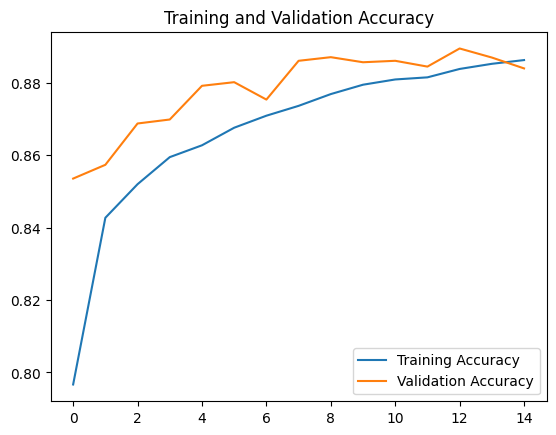

In [ ]:
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

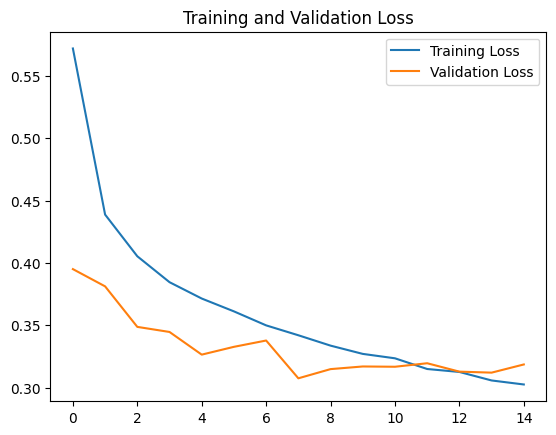

In [ ]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
true_classes = []
for _, label in test_generator:
    true_classes.extend(label)

In [ ]:
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = (predictions > 0.5).astype(int).flatten()

313/313 [==============================] - 6s 18ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)

class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)